In [1]:
#import the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#read the dataset
df_dataset=pd.read_excel("Online Retail.xlsx")

In [6]:
type(df_dataset)

pandas.core.frame.DataFrame

In [7]:
#concise summary of dataframe
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#display the first five rows of dataframe
df_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#display the last five rows of dataframe
df_dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
#identify shape of the dataframe
df_dataset.shape

(541909, 8)

In [11]:
#view the columns of dataset
print(df_dataset.columns.values)

['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country']


In [12]:
#check for any duplicate rows
df_dataset.duplicated().sum()

5268

In [13]:
df_dataset.drop_duplicates(inplace=True)

In [14]:
#check for any duplicate rows
df_dataset.duplicated().sum()

0

In [15]:
#check for any variables with null values
df_dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [16]:
df_dataset.dropna(axis=0,inplace=True)

In [17]:
#check for any variables with null values
df_dataset.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df_dataset.shape

(401604, 8)

In [19]:
df_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
#hence the quantity cant be a negative value,remove those rows with negative values

In [21]:
neg_quantity_index=df_dataset[df_dataset['Quantity']<0].index

In [22]:
df_dataset.drop(neg_quantity_index,axis=0,inplace=True)

In [23]:
df_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [24]:
df_dataset['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [25]:
#let us take the customers in UK only for analysis

In [26]:
df_dataset=df_dataset[df_dataset['Country']=='United Kingdom']

In [27]:
df_dataset.shape

(349227, 8)

In [28]:
df_dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [29]:
df_dataset['Totalamount']=df_dataset['Quantity']*df_dataset['UnitPrice']

In [30]:
df_dataset['InvoiceDate']=pd.to_datetime(df_dataset['InvoiceDate']).dt.date

In [31]:
df_dataset['InvoiceDate'].max()

datetime.date(2011, 12, 9)

In [32]:
latest_date=df_dataset['InvoiceDate'].max()+timedelta(days=1)

#### a.	Calculate RFM metrics.
i.	Recency as the time in no. of days since last transaction

ii.	Frequency as  count of purchases done 

iii.	Monetary value  as total amount spend 


In [33]:
RFM_df=df_dataset.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,
                                                          'InvoiceNo':lambda x:x.count(),
                                                          'Totalamount':lambda x:x.sum()})                                                                                                              

In [34]:
RFM_df['InvoiceDate']=RFM_df['InvoiceDate'].astype(int)

In [35]:
RFM_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency',
                       'Totalamount':'Monetary'},inplace=True)

In [36]:
RFM_df.reset_index(inplace=True)

In [37]:
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4413,33053.19
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34


#### b.	Build RFM Segments.
i.	Give Recency Frequency and Monetary scores individually by dividing them in to quartiles.

ii.	Combine three ratings to get a RFM segment (as strings)

iii.Get the RFM score by adding up the three ratings.


In [38]:
RFM_df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [39]:
RFM_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,92.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,298.110000
50%,51.000000,40.000000,644.300000
75%,143.000000,98.000000,1570.810000
max,374.000000,7676.000000,259657.300000


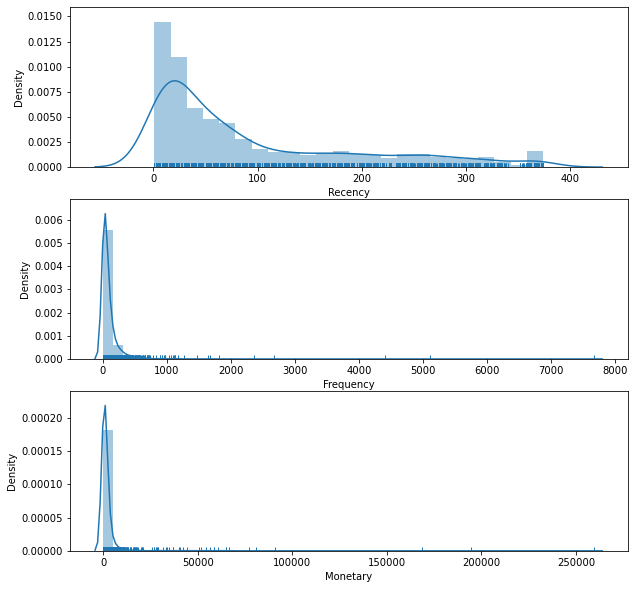

In [40]:
#sns.distpolt([['Recency', 'Frequency', 'Monetary']])
fig,axs=plt.subplots(3,1,figsize=(10,10))
#axs=axs.flatten()
sns.distplot(RFM_df['Recency'],rug=True,ax=axs[0])
sns.distplot(RFM_df['Frequency'],rug=True,ax=axs[1])
sns.distplot(RFM_df['Monetary'],rug=True,ax=axs[2]);

#### i.	Give Recency Frequency and Monetary scores individually by dividing them in to quartiles.

In [41]:
quantiles=RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14208.0,18.0,17.0,298.11
0.50,15569.0,51.0,40.0,644.30
0.75,16913.0,143.0,98.0,1570.81


In [42]:
quantiles=quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.11, 0.5: 644.3, 0.75: 1570.81}}

In [43]:
def Rscoring(x,r,q):
    if x<=q[r][0.25]:
        return 1
    elif x<=q[r][0.5]:
        return 2
    elif x<=q[r][0.75]:
        return 3
    else:
        return 4
def FMscoring(x,r,q):
    if x<=q[r][0.25]:
        return 4
    elif x<=q[r][0.5]:
        return 3
    elif x<=q[r][0.75]:
        return 2
    else:
        return 1

In [44]:
RFM_df['R']=RFM_df['Recency'].apply(Rscoring,args=('Recency',quantiles))
RFM_df['F']=RFM_df['Frequency'].apply(FMscoring,args=('Frequency',quantiles))
RFM_df['M']=RFM_df['Monetary'].apply(FMscoring,args=('Monetary',quantiles))

In [45]:
RFM_df.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,1,77183.60,4,4,1
1,12747.0,3,103,4196.01,1,1,1
2,12748.0,1,4413,33053.19,1,1,1
3,12749.0,4,199,4090.88,1,1,1
4,12820.0,4,59,942.34,1,2,2
5,12821.0,215,6,92.72,4,4,4
6,12822.0,71,46,948.88,3,2,2
7,12823.0,75,5,1759.50,3,4,1
8,12824.0,60,25,397.12,3,3,3
9,12826.0,3,91,1474.72,1,2,2


#### ii.	Combine three ratings to get a RFM segment (as strings)

In [46]:
RFM_df['RFM_segment']=RFM_df.R.astype(str)+RFM_df.F.astype(str)+RFM_df.M.astype(str)
#astype or map can be used

In [47]:
RFM_df.head(2)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment
0,12346.0,326,1,77183.60,4,4,1,441
1,12747.0,3,103,4196.01,1,1,1,111


#### iii.	Get the RFM score by adding up the three ratings

In [48]:
RFM_df['RFM_score']=RFM_df.R+RFM_df.F+RFM_df.M

In [49]:
RFM_df.head(2)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
0,12346.0,326,1,77183.60,4,4,1,441,9
1,12747.0,3,103,4196.01,1,1,1,111,3


In [50]:
#Assign loyalty level to each customers

In [51]:
RFM_df['loyalty_level']=pd.qcut(RFM_df['RFM_score'],q=4,labels=['platinum','gold','silver','bronze'])
RFM_df.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,loyalty_level
0,12346.0,326,1,77183.60,4,4,1,441,9,silver
1,12747.0,3,103,4196.01,1,1,1,111,3,platinum
2,12748.0,1,4413,33053.19,1,1,1,111,3,platinum
3,12749.0,4,199,4090.88,1,1,1,111,3,platinum
4,12820.0,4,59,942.34,1,2,2,122,5,platinum
5,12821.0,215,6,92.72,4,4,4,444,12,bronze
6,12822.0,71,46,948.88,3,2,2,322,7,gold
7,12823.0,75,5,1759.50,3,4,1,341,8,gold
8,12824.0,60,25,397.12,3,3,3,333,9,silver
9,12826.0,3,91,1474.72,1,2,2,122,5,platinum


#### 4.	Create clusters using k means clustering algorithm.
a.	Prepare the data for the algorithm.

i.	If the data is Un Symmetrically distributed, manage the skewness with appropriate transformation.

ii.	Standardize / scale the data.

b.	Decide the optimum number of clusters to be formed

c.	Analyse these clusters and comment on the results.


#### i.	If the data is Un Symmetrically distributed, manage the skewness with appropriate transformation.

In [52]:
RFM_df[(RFM_df['Recency']<=0)|(RFM_df['Monetary']<=0)]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,loyalty_level
314,13256.0,15,1,0.0,1,4,4,144,9,silver


In [53]:
#replace negative or zero values with one otherwise it may leads to infinity during log transformation
def replace_neg_zero(x):
    if(x<=0):
        return 1
    else:
        return x

In [54]:
RFM_df['Recency']=RFM_df['Recency'].apply(replace_neg_zero)
RFM_df['Monetary']=RFM_df['Monetary'].apply(replace_neg_zero)

In [55]:
RFM_df[(RFM_df['Recency']<=0)|(RFM_df['Monetary']<=0)]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,loyalty_level


In [56]:
#as the data is Un Symmetrically distributed ie right skewed in the case of 'Recency', 'Frequency', 'Monetary
#manage the skewness with log transformationto bring data into normal or near normal

In [57]:
log_RFM_df=RFM_df[['Recency', 'Frequency', 'Monetary']].apply(np.log,axis=1).round(3)
log_RFM_df.head()

,Recency,Frequency,Monetary
0,5.787,0.000,11.254
1,1.099,4.635,8.342
2,0.000,8.392,10.406
3,1.386,5.293,8.317
4,1.386,4.078,6.848


In [58]:
#distribution plot after transformation

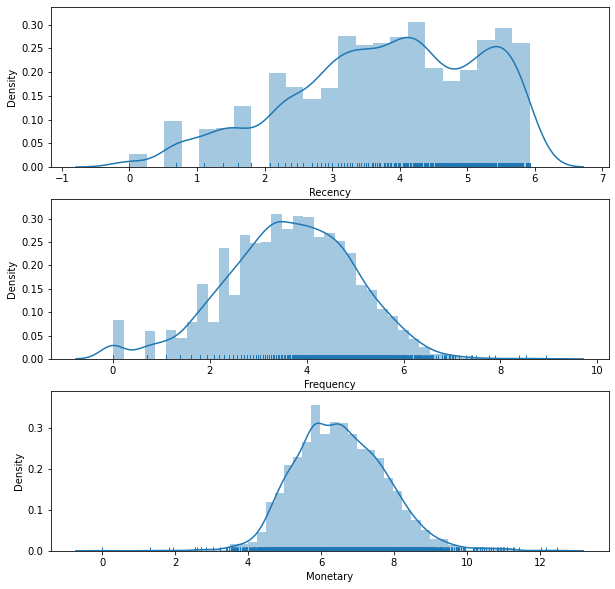

In [59]:
fig,axs=plt.subplots(3,1,figsize=(10,10))
#axs=axs.flatten()
sns.distplot(log_RFM_df['Recency'],rug=True,ax=axs[0])
sns.distplot(log_RFM_df['Frequency'],rug=True,ax=axs[1])
sns.distplot(log_RFM_df['Monetary'],rug=True,ax=axs[2]);

In [60]:
#bring the data on same scale

In [61]:
scale_obj=StandardScaler()

In [62]:
scaled_data=scale_obj.fit_transform(log_RFM_df)

In [63]:
scaled_data

array([[ 1.43878163, -2.73885121,  3.76859274],
       [-1.9531376 ,  0.73687013,  1.44256522],
       [-2.74829955,  3.55419162,  3.09123308],
       ...,
       [-1.24407598, -0.87538464, -1.08155804],
       [-1.74548384,  2.19614818,  0.8682473 ],
       [-0.02709472,  0.44666427,  0.78277857]])

In [64]:
#transform it into dataframe
scaled_data=pd.DataFrame(scaled_data,columns=log_RFM_df.columns)
scaled_data.head()

,Recency,Frequency,Monetary
0,1.438782,-2.738851,3.768593
1,-1.953138,0.736870,1.442565
2,-2.748300,3.554192,3.091233
3,-1.745484,1.230295,1.422596
4,-1.745484,0.319184,0.249198


In [65]:
#within clusters sum of squared distance(wcss)
wcss={}
for k in range(1,15):
    knn=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    knn=knn.fit(scaled_data)
    wcss[k]=knn.inertia_

In [66]:
#plot the graph for wcss and number of clusters(k)

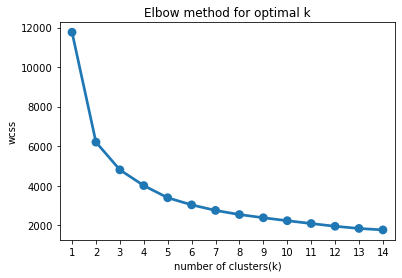

In [67]:
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()))
plt.xlabel('number of clusters(k)')
plt.ylabel('wcss')
plt.title('Elbow method for optimal k')
plt.show()

In [111]:
#perform the k-means clustering or build the k-means clustering model
kmeans_cluster=KMeans(n_clusters=3,init='k-means++',max_iter=1000)
kmeans_cluster=kmeans_cluster.fit(scaled_data)

In [112]:
#find the clusters for the observation
RFM_df['cluster']=kmeans_cluster.labels_
RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,loyalty_level,cluster,color
0,12346.0,326,1,77183.60,4,4,1,441,9,silver,0,green
1,12747.0,3,103,4196.01,1,1,1,111,3,platinum,2,yellow
2,12748.0,1,4413,33053.19,1,1,1,111,3,platinum,2,yellow
3,12749.0,4,199,4090.88,1,1,1,111,3,platinum,2,yellow
4,12820.0,4,59,942.34,1,2,2,122,5,platinum,2,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,278,10,180.60,4,4,4,444,12,bronze,1,blue
3917,18281.0,181,7,80.82,4,4,4,444,12,bronze,1,blue
3918,18282.0,8,12,178.05,1,4,4,144,9,silver,1,red
3919,18283.0,4,721,2045.53,1,1,1,111,3,platinum,2,yellow


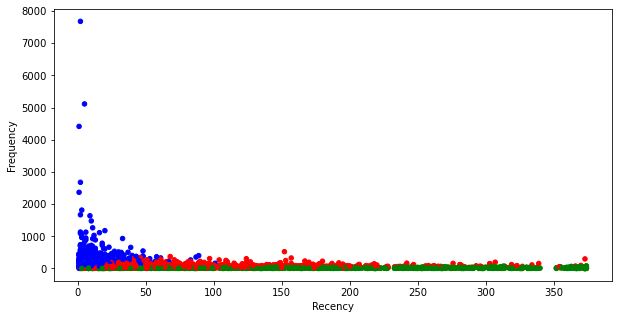

In [113]:
#scatter plot Frequency vs Recency
colors=['red','green','blue']
RFM_df['color']=RFM_df['cluster'].map(lambda x:colors[x])
RFM_df.plot(kind='scatter',x='Recency',y='Frequency',figsize=(10,5),c=RFM_df['color']);

In [114]:
RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score,loyalty_level,cluster,color
0,12346.0,326,1,77183.60,4,4,1,441,9,silver,0,red
1,12747.0,3,103,4196.01,1,1,1,111,3,platinum,2,blue
2,12748.0,1,4413,33053.19,1,1,1,111,3,platinum,2,blue
3,12749.0,4,199,4090.88,1,1,1,111,3,platinum,2,blue
4,12820.0,4,59,942.34,1,2,2,122,5,platinum,2,blue
...,...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,278,10,180.60,4,4,4,444,12,bronze,1,green
3917,18281.0,181,7,80.82,4,4,4,444,12,bronze,1,green
3918,18282.0,8,12,178.05,1,4,4,144,9,silver,1,green
3919,18283.0,4,721,2045.53,1,1,1,111,3,platinum,2,blue


#### Training and testing the dataset

In [ ]:
#now the unsupervised model is changed to a supervised model 
#cosidering 'Recency', 'Frequency', 'Monetary' as features and cluster as target,let us do the training 
#and make the model prediction and check the accuracy of our model

In [115]:
scaled_data.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [116]:
features=scaled_data[['Recency', 'Frequency', 'Monetary']]

In [117]:
target=RFM_df['cluster']

In [118]:
X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=4)

In [119]:
rf_classifier = RandomForestClassifier()

In [120]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
y_pred = rf_classifier.predict(X_test)

In [122]:
print("TEST RESULTS")
print("---------------")
print("Mean absolute error on test data:",mean_absolute_error(y_pred,y_test))
print("Mean squared error on test data:",mean_squared_error(y_pred,y_test))
print("Root mean squared error on test data:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("The test accuracy for RandomForestClassifier : ",accuracy_score(y_test,y_pred))
print("The confusion_matrix for RandomForestClassifier : \n",confusion_matrix(y_test, y_pred))
print("The classification_report for RandomForestClassifier : \n",classification_report(y_test, y_pred))

TEST RESULTS
---------------
Mean absolute error on test data: 0.05352591333899745
Mean squared error on test data: 0.09260832625318606
Root mean squared error on test data: 0.304316161669383
The test accuracy for RandomForestClassifier :  0.9660152931180969
The confusion_matrix for RandomForestClassifier : 
 [[472   6  10]
 [ 11 411   0]
 [ 13   0 254]]
The classification_report for RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       488
           1       0.99      0.97      0.98       422
           2       0.96      0.95      0.96       267

    accuracy                           0.97      1177
   macro avg       0.97      0.96      0.97      1177
weighted avg       0.97      0.97      0.97      1177

